In [1]:
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

df = pd.read_csv('20200124_ews_observations.csv', low_memory=False)

### Preprocessing dataset

In [2]:
df

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50.0000000,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44.0000000,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27.0000000,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27.0000000,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16.0000000,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171731,20278,2020-01-02 08:57:05.0000000,NEWS2,3,88.0,3.0,ALERT,0,100.0,0.0,False,0.0,72,0,14,0,36.1,0
171732,20480,2020-01-02 08:58:46.0000000,NEWS2,3,83.0,3.0,ALERT,0,92.0,0.0,False,0.0,79,0,18,0,36.8,0
171733,2499,2020-01-02 09:03:14.0000000,NEWS2,0,118.0,0.0,ALERT,0,98.0,0.0,False,0.0,82,0,20,0,36.2,0
171734,20527,2020-01-02 09:03:20.0000000,NEWS2,0,129.0,0.0,ALERT,0,98.0,0.0,False,0.0,70,0,16,0,36.5,0


In [3]:
# print(df.LOC.unique())
# print(df.EwsProcedure.unique())
# print(df.Add_O2.unique())

In [4]:
df.isnull().sum()

PatientId              0
ObservationDate        0
EwsProcedure           0
EWS_Total              0
SBP                10787
SBP_Score          10787
LOC                    0
LOC_Score              0
SpO2                   2
SpO2_Score             2
Add_O2                 2
Add_O2_Score           2
HR                     0
HR_Score               0
RR                     0
RR_Score               0
TEMP                   0
TEMP_Score             0
dtype: int64

In [5]:
# https://journals.lww.com/nursing/Citation/2008/08000/Documenting_level_of_consciousness.53.aspx#:~:text=The%20scale%20measures%20three%20subscales,of%203%20indicates%20deep%20coma.
# how do you score LOC?

df_sbp_mean = df['SBP'].dropna().mean()
df['SBP'] = df['SBP'].fillna(df_sbp_mean) # is it good to replace with the mean?

df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Year'] = pd.DatetimeIndex(df['ObservationDate']).year
df['Month'] = pd.DatetimeIndex(df['ObservationDate']).month
df['Day'] = pd.DatetimeIndex(df['ObservationDate']).day
df['Time'] = pd.DatetimeIndex(df['ObservationDate']).time

df = df.drop(['EwsProcedure', 'LOC','Add_O2'], axis=1)

In [6]:
patient_value_counts = df.PatientId.value_counts().sort_values(ascending=False)
print(patient_value_counts.head(10))

# how many percent of patients has only 1 observation? What is the correlation matrix for people with 
# more observations in the dataset?

def make_dataframe_returning_patients(df, measurements):
    patient_observations_dict = df['PatientId'].value_counts().to_dict()
    
    pat_list = {k: v for k, v in patient_observations.items() if v < measurements}.keys()
    df_ret = df[~df.PatientId.isin(pat_list)]
    
    print(f"Number of patients: {df_ret.PatientId.nunique()}")
    print(f"Measurements: {df_ret.shape[0]}")
    return df_ret

1743    643
5797    441
1261    441
630     356
1841    351
1199    310
3080    305
6995    305
1092    284
523     278
Name: PatientId, dtype: int64


In [7]:
df = df[df['TEMP'].between(30, 45)]
df_normal_temp = df[df['TEMP'].between(36, 38)]

df_abnormal_temp_above = df[df['TEMP'] > 38]
df_abnormal_temp_below = df[df['TEMP'] < 36]
df_abnormal_temp = pd.concat([df_abnormal_temp_above,df_abnormal_temp_below])

df_abnormal_temp_counts = df_abnormal_temp['PatientId'].value_counts().sort_values(ascending=False)
df_abnormal_counts = df_abnormal_temp['TEMP'].value_counts().sort_values(ascending=False) #ID maybe more than once per temperature

# print(df_abnormal_temp_counts)
# print(df_abnormal_counts)
# print(df_abnormal_temp[['PatientId','TEMP']])
# print(df_normal_temp['TEMP'].min())

#write algo that tests if correlations go higher if we exclude or include people with higher or lower temperature

# print(df_abnormal_temp_above['TEMP'].min())
# print(df_abnormal_temp_below['TEMP'].max())

2019-05-18 09:28:29
2019-12-05 18:02:32


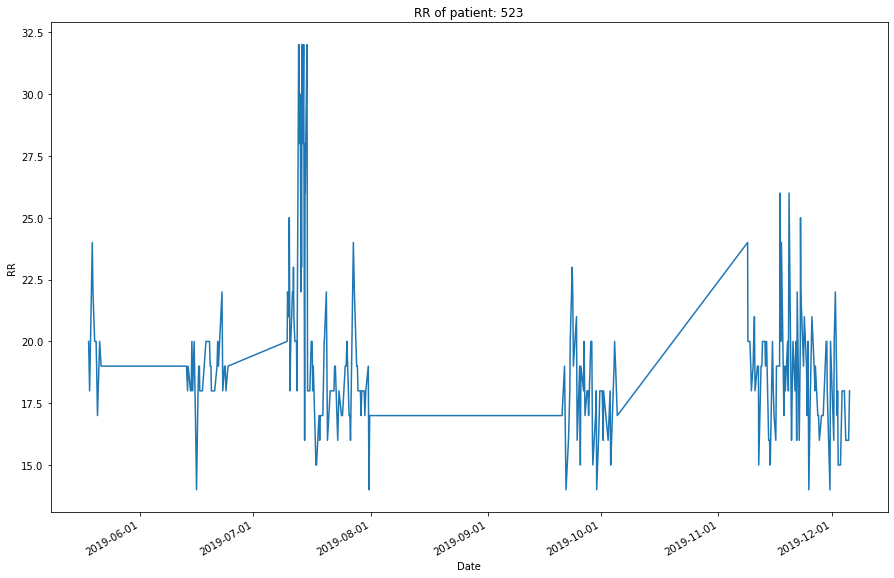

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


patientid = 523
hr = 'HR'
temp = 'TEMP'
rr = 'RR'
sbp = 'SBP'
ews_total = 'EWS_Total'

def plot_data_id(df, patientId, metric):
    data_id = df[df['PatientId'] == patientId]
    startdate = data_id.ObservationDate.min()
    print(startdate)
    enddate = data_id.ObservationDate.max()
    print(enddate)
    
    dates = data_id['ObservationDate']
    data = data_id[f'{metric}']
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    ax.plot(dates, data)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    plt.title(f'{metric} of patient: {patientId}')
    plt.xlabel('Date')
    plt.ylabel(f'{metric}')
    

plot_data_id(df_normal_temp, patientid, rr)

In [9]:
from datetime import datetime
from datetime import timedelta

# def add_quarterly_time_to_timeseries_per_patient(df, patientId):

patientid = 523
df_patientId = df[df['PatientId'] == patientid]

def daterange(start, end):
    date_range_df = []
    while start < end:
        date_range_df.append(start)
        start += timedelta(minutes=1)
    start - timedelta(seconds = 1) #to get xx:xx:59:59 for the last line
    
    date_range_df = pd.DataFrame(date_range_df)
    return date_range_df

def minute_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=t.minute, hour=0)
               +timedelta(minutes=t.minute//1))

start_date = str(minute_rounder(df_patientId['ObservationDate'].min()) - timedelta(minutes=1))
end_date = str(minute_rounder(df_patientId['ObservationDate'].max()) + timedelta(minutes=1))

start_date_object = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
end_date_object = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')

def make_timestamp(lst):
    timestamp = []
    for i in lst:
        timestamp.append(datetime.timestamp(i))
    return timestamp
        
# df_patientId['ObservationDate'] = make_timestamp(df_patientId['ObservationDate'])
# print(df_patientId['ObservationDate'])
# df_patientId['ObservationDate'] = df_patientId.apply(lambda x: x['ObservationDate'].replace(minute=x.minute)+timedelta(minutes=x.minute//1), axis=1)

df_patientId_evenly_spaced_time = daterange(start_date_object,end_date_object)


# merged_datetime_df = pd.merge_asof(df_patientId, daterange(start_date_object,end_date_object), left_on="ObservationDate", right_on="0", direction="nearest")

,PatientId,ObservationDate,EWS_Total,SBP,SBP_Score,LOC_Score,SpO2,SpO2_Score,Add_O2_Score,HR,...,HR_MA_25,TEMP_MA_25,RR_MA_25,SBP_MA_25,EWS_Total_MA_25,HR_MA_10,TEMP_MA_10,RR_MA_10,SBP_MA_10,EWS_Total_MA_10
4871,523,2019-05-18 09:28:29,3,136.000000,0.0,0,95.0,1.0,0.0,121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,523,2019-05-18 15:44:03,2,122.000000,0.0,0,95.0,1.0,0.0,107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5309,523,2019-05-19 08:44:21,4,133.000000,0.0,0,98.0,0.0,0.0,113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5397,523,2019-05-19 13:06:54,7,105.000000,1.0,0,93.0,2.0,0.0,112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5630,523,2019-05-19 23:56:11,1,122.000000,0.0,0,100.0,0.0,0.0,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5774,523,2019-05-20 08:51:35,3,99.000000,2.0,0,97.0,0.0,0.0,107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5862,523,2019-05-20 12:19:40,1,113.000000,0.0,0,100.0,0.0,0.0,108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997,523,2019-05-20 17:47:51,2,115.000000,0.0,0,93.0,0.0,0.0,112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6226,523,2019-05-21 07:35:12,2,102.000000,1.0,0,99.0,0.0,0.0,106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6436,523,2019-05-21 16:45:14,2,103.000000,1.0,0,92.0,0.0,0.0,109,...,NaN,NaN,NaN,NaN,NaN,109.1,36.67,19.9,115.000000,2.7


<ipython-input-28-cfa83d803249>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_patientId[new_column] = df_patientId[f'{column}'].rolling(window=window).mean()


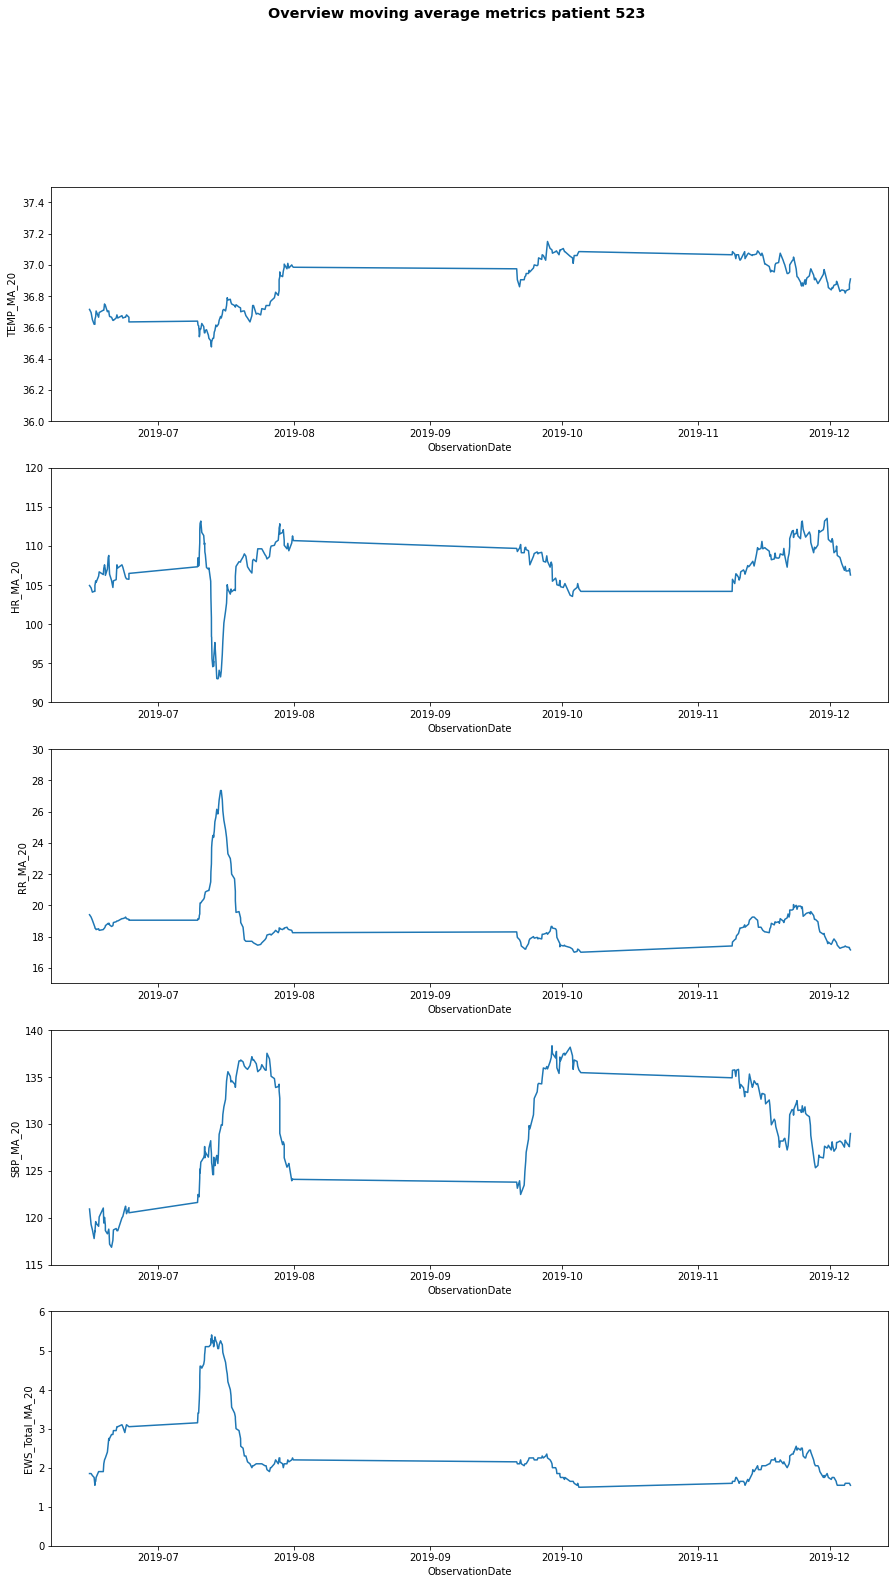

In [28]:
patientid = 523

hr = 'HR'
temp = 'TEMP'
rr = 'RR'
sbp = 'SBP'
ews_total = 'EWS_Total'

window = 20

def df_patient(df, patientid):
    df_patientId = df[df['PatientId'] == patientid]
    return df_patientId

def new_column(column, window):
    return f'{column}_MA_{window}'

def add_moving_averages(df_patient, window, column, new_column):
    if new_column in df_patient.columns:
        print(f'Column "{new_column}" already exists.')
    else:
        df_patientId[new_column] = df_patientId[f'{column}'].rolling(window=window).mean()
    return df_patientId

display(df_patientId.head(25))

df_patient_with_MA_hr = add_moving_averages(df_patient(df, patientid), window, hr, new_column(hr, window))
df_patient_with_MA_temp = add_moving_averages(df_patient(df, patientid), window, temp, new_column(temp, window))
df_patient_with_MA_rr = add_moving_averages(df_patient(df, patientid), window, rr, new_column(rr, window))
df_patient_with_MA_sbp = add_moving_averages(df_patient(df, patientid), window, sbp, new_column(sbp, window))
df_patient_with_MA_ews_total = add_moving_averages(df_patient(df, patientid), window, ews_total, new_column(ews_total, window))


# fig = plt.figure(figsize=(5, 15))
fig, axes = plt.subplots(5, 1, figsize=(15,25),sharey=False, )
fig.suptitle(f"Overview moving average metrics patient {patientid}", fontsize = "x-large", fontweight = 'bold')
sns.lineplot(ax=axes[0], data=df_patient_with_MA_temp, x="ObservationDate", y=new_column(temp, window))
axes[0].set(ylim=(36,37.5))

sns.lineplot(ax=axes[1], data=df_patient_with_MA_hr, x="ObservationDate", y=new_column(hr, window))
axes[1].set(ylim=(90, 120))

sns.lineplot(ax=axes[2], data=df_patient_with_MA_rr, x="ObservationDate", y=new_column(rr, window))
axes[2].set(ylim=(15, 30))

sns.lineplot(ax=axes[3], data=df_patient_with_MA_sbp, x="ObservationDate", y=new_column(sbp, window))
axes[3].set(ylim=(115, 140))

sns.lineplot(ax=axes[4], data=df_patient_with_MA_ews_total, x="ObservationDate", y=new_column(ews_total, window))
axes[4].set(ylim=(0, 6))
plt.show()

### Checking correlations

In [ ]:
from scipy.stats.stats import pearsonr

df_ex_scores = df[['PatientId','EWS_Total','SBP','LOC_Score','SpO2','HR','RR','TEMP', 'Add_O2_Score']]

plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df_ex_scores.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap _ FULL TEMP', fontdict={'fontsize':18}, pad=12)

In [ ]:
df_normal_temp = df_normal_temp[['PatientId','EWS_Total','SBP','LOC_Score','SpO2','HR','RR','TEMP', 'Add_O2_Score']]
df_abnormal_temp = df_abnormal_temp[['PatientId','EWS_Total','SBP','LOC_Score','SpO2','HR','RR','TEMP', 'Add_O2_Score']]

plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df_abnormal_temp.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap _ ABNORMAL TEMP', fontdict={'fontsize':18}, pad=12)

In [ ]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df_normal_temp.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap _ NORMAL TEMP', fontdict={'fontsize':18}, pad=12)

In [ ]:
plt.figure(figsize=(30, 30))
sns.pairplot(df_abnormal_temp[['TEMP','EWS_Total']], size=5)

In [ ]:
plt.figure(figsize=(30, 30))
sns.pairplot(df[['TEMP','EWS_Total']], size=5)